# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bintang Cahya Anwar
- **Email:** bintangcanwar@gmail.com
- **ID Dicoding:** bintangcahya58

## Menentukan Pertanyaan Bisnis

- Pada musim apa jumlah penyewaan sepeda tertinggi?
- Pada jam berapa peminjaman sepeda mencapai jumlah tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Memanggil library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat file csv dan menampilkan 5 baris pertama DataFrame day_df
day_df = pd.read_csv("https://raw.githubusercontent.com/bintang58/bike-sharing-analysis/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat file csv dan menampilkan 5 baris pertama DataFrame hour_df
hour_df = pd.read_csv("https://raw.githubusercontent.com/bintang58/bike-sharing-analysis/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengumpulkan data dari tabel day dan hour menjadi sebuah DataFrame
- Menampilkan 5 baris pertama dari DataFrame day_df & hour_df

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
# Menampilkan informasi ringkas tentang DataFrame day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengecek missing values di setiap kolom dalam DataFrame day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Mengecek jumlah data duplikat dan menampilkan statistik dari kolom numerik dalam DataFrame day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [7]:
# Menampilkan informasi ringkas tentang DataFrame hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Mengecek missing values di setiap kolom dalam DataFrame hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Mengecek jumlah data duplikat dan menampilkan parameter statistik dari kolom numerik dalam DataFrame hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value, duplikasi data, atau data yang tidak akurat pada kedua DataFrame (day_df dan hour_df).
- Terdapat satu kesalahan tipe data di kedua DataFrame, yaitu kolom dteday, yang masih bertipe object dan perlu dikonversi menjadi datetime.

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Dropping

In [10]:
# Menghapus kolom "holiday" karena sudah terwakili oleh kolom "workingday"
day_df.drop(["holiday"], axis=1, inplace=True)

##### Memperbaiki tipe data


In [11]:
# List kolom yang ingin diubah dari int menjadi category
category_columns = ["season", "mnth", "workingday", "weekday", "weathersit"]

# Ubah tipe data kolom kategori
for col in category_columns:
    day_df[col] = day_df[col].astype("category")

# Ubah kolom "dteday" dari object menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [12]:
# Menampilkan informasi ringkas tentang DataFrame day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

##### Rename

In [13]:
#Mengubah nama kolom di day_df agar lebih mudah dipahami
day_df.rename(
    columns={
        "dteday": "date",
        "yr": "year",
        "mnth": "month",
        "weekday": "day",
        "weathersit": "weather",
        "hum": "humidity",
        "cnt": "count"
    },
    inplace=True
)

In [14]:
# Mengonversi nilai dalam kolom 'season' di day_df agar lebih mudah dipahami
# 1 → Springer, 2 → Summer, 3 → Fall, 4 → Winter
day_df["season"] = day_df["season"].cat.rename_categories({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# Mengonversi nilai dalam kolom 'year' di day_df agar lebih mudah dipahami
# 0 → 2011, 1 → 2012
day_df["year"] = day_df["year"].replace({
    0: "2011",
    1: "2012"
})

day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
# Mengonversi nilai dalam kolom "month" di day_df agar lebih mudah dipahami
# 1 → January, 2 → February, ..., 12 → December
day_df["month"] = day_df["month"].cat.rename_categories({
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
})

day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
# Mengonversi nilai dalam kolom 'day' di day_df agar lebih mudah dipahami
# 0 → Sunday, 1 → Monday, ..., 6 → Saturday
day_df["day"] = day_df["day"].cat.rename_categories({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
})

day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mengonversi nilai dalam kolom 'workingday' di day_df agar lebih mudah dipahami
# Jika 'workingday' = 0 atau 'day' adalah Saturday/Sunday → Weekend
# Jika 'workingday' = 1 → Weekdays
day_df["workingday"] = day_df.apply(
    lambda row: "Weekend" if row["workingday"] == 0 or row["day"] in ["Saturday", "Sunday"] else "Weekdays",
    axis=1
)

day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,Saturday,Weekend,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,Weekend,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,Weekdays,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,Weekdays,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,Weekdays,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Mengonversi nilai dalam kolom 'weather' di day_df agar lebih mudah dipahami
# 1 → Clear, 2 → Mist, 3 → Light Snow, 4 → Heavy Rain
day_df["weather"] = day_df["weather"].cat.rename_categories({
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
})

day_df.head()

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Sunday,Weekend,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Monday,Weekdays,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Tuesday,Weekdays,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Wednesday,Weekdays,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan tabel `hour_df`

##### Dropping

In [20]:
# Menghapus kolom "holiday" karena sudah terwakili oleh kolom "workingday"
hour_df.drop(['holiday'], axis=1, inplace=True)

##### Memperbaiki tipe data

In [21]:
# List kolom yang ingin diubah dari int menjadi category
category_columns = ["season", "mnth", "workingday", "weekday", "weathersit"]

# Ubah tipe data kolom kategori
for column in category_columns:
  hour_df[column] = hour_df[column].astype("category")

# Ubah kolom "dteday" dari object menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [22]:
# Menampilkan informasi ringkas tentang DataFrame hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(5), dateti

##### Rename

In [23]:
# Mengubah nama kolom di hour_df agar lebih mudah dipahami
hour_df.rename(
    columns={
        "dteday": "date",
        "yr": "year",
        "mnth": "month",
        "hr": "hour",
        "weekday": "day",
        "weathersit": "weather",
        "hum": "humidity",
        "cnt": "count"
    },
    inplace=True
)

In [24]:
# Mengonversi nilai dalam kolom 'season' di hour_df agar lebih mudah dipahami
# 1 → Springer, 2 → Summer, 3 → Fall, 4 → Winter
hour_df["season"] = hour_df["season"].cat.rename_categories({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
# Mengonversi nilai dalam kolom 'year' di hour_df agar lebih mudah dipahami
# 0 → 2011, 1 → 2012
hour_df["year"] = hour_df["year"].replace({
    0: "2011",
    1: "2012"
})

hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
# Mengonversi nilai dalam kolom 'month' di hour_df agar lebih mudah dipahami
# 1 → January, 2 → February, ..., 12 → December
hour_df["month"] = hour_df["month"].cat.rename_categories({
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
})

hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
# Mengonversi nilai dalam kolom 'day' di hour_df agar lebih mudah dipahami
# 0 → Sunday, 1 → Monday, ..., 6 → Saturday
hour_df["day"] = hour_df["day"].cat.rename_categories({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})

hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
# Mengonversi nilai dalam kolom 'workingday' di hour_df agar lebih mudah dipahami
# Jika 'workingday' = 0 atau 'day' adalah Saturday/Sunday → Weekend
# Jika 'workingday' = 1 → Weekdays
hour_df["workingday"] = hour_df.apply(
    lambda row: "Weekend" if row["workingday"] == 0 or row["day"] in ["Saturday", "Sunday"] else "Weekdays",
    axis=1
)

hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,Saturday,Weekend,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,Saturday,Weekend,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,Saturday,Weekend,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,Saturday,Weekend,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,Saturday,Weekend,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
# Mengonversi nilai dalam kolom 'weather' di hour_df agar lebih mudah dipahami
# 1 → Clear, 2 → Mist, 3 → Light Snow, 4 → Heavy Rain
hour_df["weather"] = hour_df["weather"].cat.rename_categories({
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
})

hour_df.head()

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,Saturday,Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kolom holiday telah dihapus dari day_df dan hour_df.
- Tipe data pada kolom dteday telah dikonversi menjadi datetime di day_df dan hour_df.
- Kolom season, mnth, holiday, weekday, workingday, dan weathersit yang sebelumnya bertipe int telah diubah menjadi category di day_df dan hour_df.
- Nama dan isi kolom telah disesuaikan serta dikonversi agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [30]:
# Menampilkan parameter statistik serta menyertakan kolom non-numerik dalam DataFrame hour_df
day_df.describe(include="all")

,instant,date,season,year,month,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,Sunday,Weekdays,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
day_df.groupby(by="season", observed=False)["count"].sum() \
    .sort_values(ascending=False) \
    .reset_index()

,season,count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


### Explore `hour_df`

In [32]:
# Menampilkan parameter statistik serta menyertakan kolom non-numerik dalam DataFrame hour_df
hour_df.describe(include="all")

,instant,date,season,year,month,hour,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,Saturday,Weekdays,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [33]:
hour_df.groupby(by="hour").agg({
    "count": "sum"
})

,count
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [34]:
max_hour = hour_df.groupby("hour")["count"].sum().idxmax()
min_hour = hour_df.groupby("hour")["count"].sum().idxmin()
print(f"Peminjaman tertinggi terjadi pada jam {max_hour} dan terendah pada jam {min_hour}.")

Peminjaman tertinggi terjadi pada jam 17 dan terendah pada jam 4.


**Insight:**
- Berdasarkan rangkuman parameter statistik `hour_df` dan `day_df`, kita akan memperoleh informasi data mencakup periode dari 1 Januari 2011 hingga 31 Desember 2012 dengan jumlah pelanggan sebanyak 17379 orang.
- Pada pivot table `day_df`, musim dengan jumlah penyewaan sepeda tertinggi adalah musim Fall.
- Sementara itu, pada pivot table `hour_df`, peminjaman sepeda tertinggi terjadi pada pukul 17.00, sedangkan peminjaman terendah terjadi pada pukul 04.00.

## Visualization & Explanatory Analysis
- Pada musim apa jumlah penyewaan sepeda tertinggi?
- Pada jam berapa peminjaman sepeda mencapai jumlah tertinggi dan terendah?

### Pertanyaan 1: Pada musim apa jumlah penyewaan sepeda tertinggi?

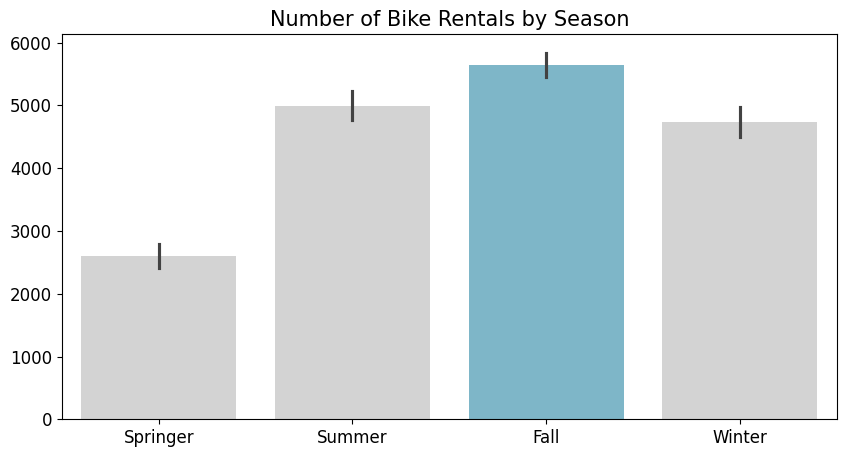

In [35]:
# Membuat subplot dengan 1 baris dan 1 kolom, ukuran (20, 10)
fig, ax = plt.subplots(figsize=(10, 5))

# Menentukan warna untuk plot
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# Membuat barplot untuk y="count" dan x="season", data diurutkan berdasarkan "season"
sns.barplot(
    y="count",
    x="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    hue="season",
    legend=False,
    ax=ax
)

# Menambahkan judul, menghilangkan label y dan x, serta mengatur ukuran label pada sumbu x dan y
ax.set_title("Number of Bike Rentals by Season", loc="center", fontsize=15)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# Menampilkan plot
plt.show()

### Pertanyaan 2: Pada jam berapa peminjaman sepeda mencapai jumlah tertinggi dan terendah?

In [36]:
sum_order_items_df = hour_df.groupby("hour")["count"].sum() \
    .sort_values(ascending=False) \
    .reset_index()

sum_order_items_df

,hour,count
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


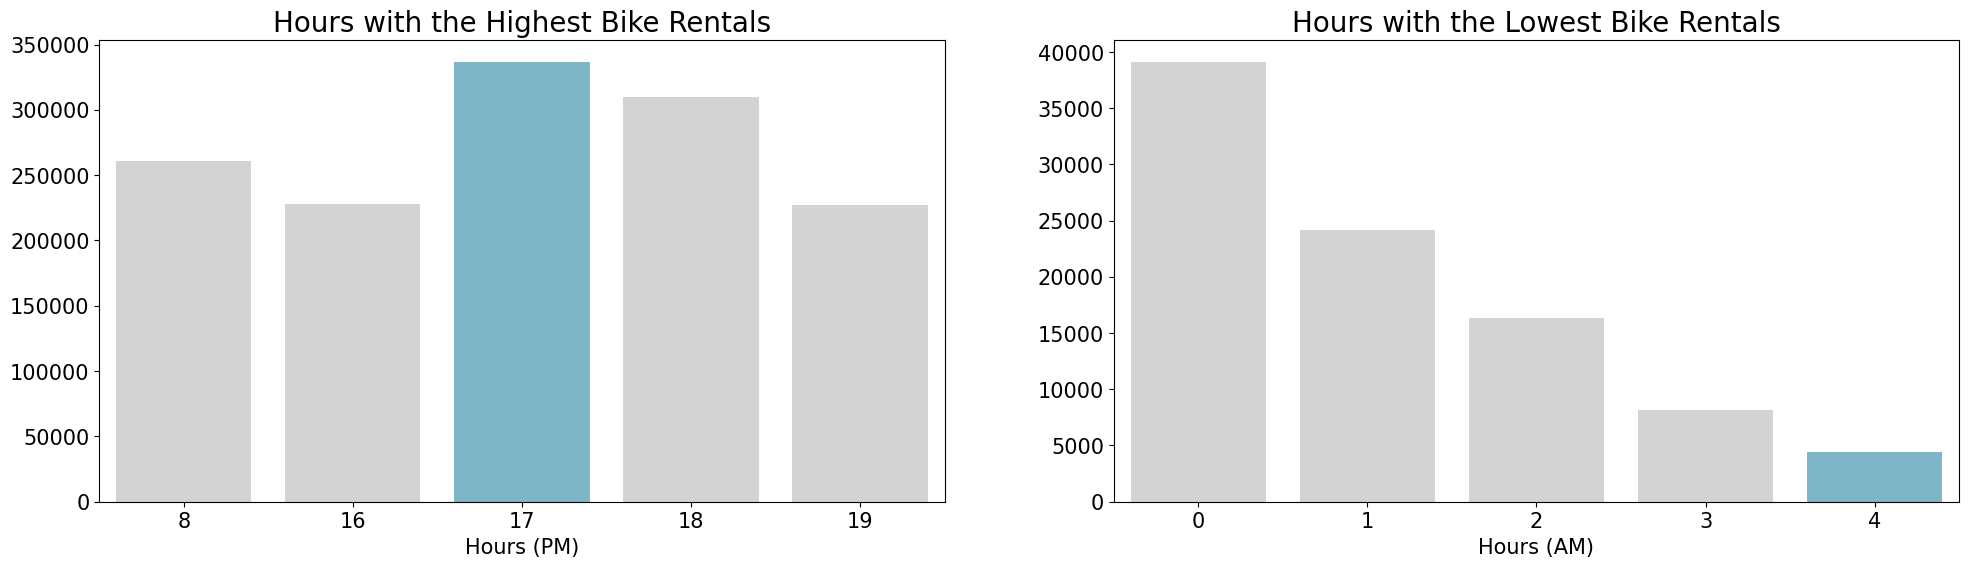

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Menentukan warna untuk barplot pertama dan kedua
colors1 = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]
colors2 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

# Membuat barplot untuk jam dengan peminjaman tertinggi
sns.barplot(
    x="hour",
    y="count",
    data=sum_order_items_df.head(5),
    palette=colors1,
    hue="hour",
    legend=False,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=15)
ax[0].set_title("Hours with the Highest Bike Rentals", loc="center", fontsize=20)
ax[0].tick_params(axis ="y", labelsize=15)
ax[0].tick_params(axis ="x", labelsize=15)

# Membuat barplot untuk jam dengan peminjaman terendah
sns.barplot(
    x="hour",
    y="count",
    data=sum_order_items_df.sort_values(by="hour", ascending=True).head(5),
    palette=colors2,
    hue="hour",
    legend=False,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)", fontsize=15)
ax[1].set_title("Hours with the Lowest Bike Rentals", loc="center", fontsize=20)
ax[1].tick_params(axis="y", labelsize=15)
ax[1].tick_params(axis="x", labelsize=15)

# Menampilkan plot
plt.show()

**Insight:**
- Musim Fall merupakan musim yang memiliki jumlah penyewaan sepeda tertinggi
- Jam peminjaman sepeda tertinggi terdapat pada jam 17.00 dan yang terendah terdapat pada jam 04.00

## RFM Analysis

In [38]:
rfm_df = day_df.groupby(by="day", as_index=False, observed=False).agg({
    "date": "max",        # Mengambil tanggal order terakhir
    "instant": "nunique", # Menghitung jumlah order
    "count": "sum"        # Menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom 'max_order_timestamp' setelah digunakan
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,day,frequency,monetary,recency
0,Sunday,105,444027,1
1,Monday,105,455503,0
2,Tuesday,104,469109,6
3,Wednesday,104,473048,5
4,Thursday,104,485395,4
5,Friday,104,487790,3
6,Saturday,105,477807,2


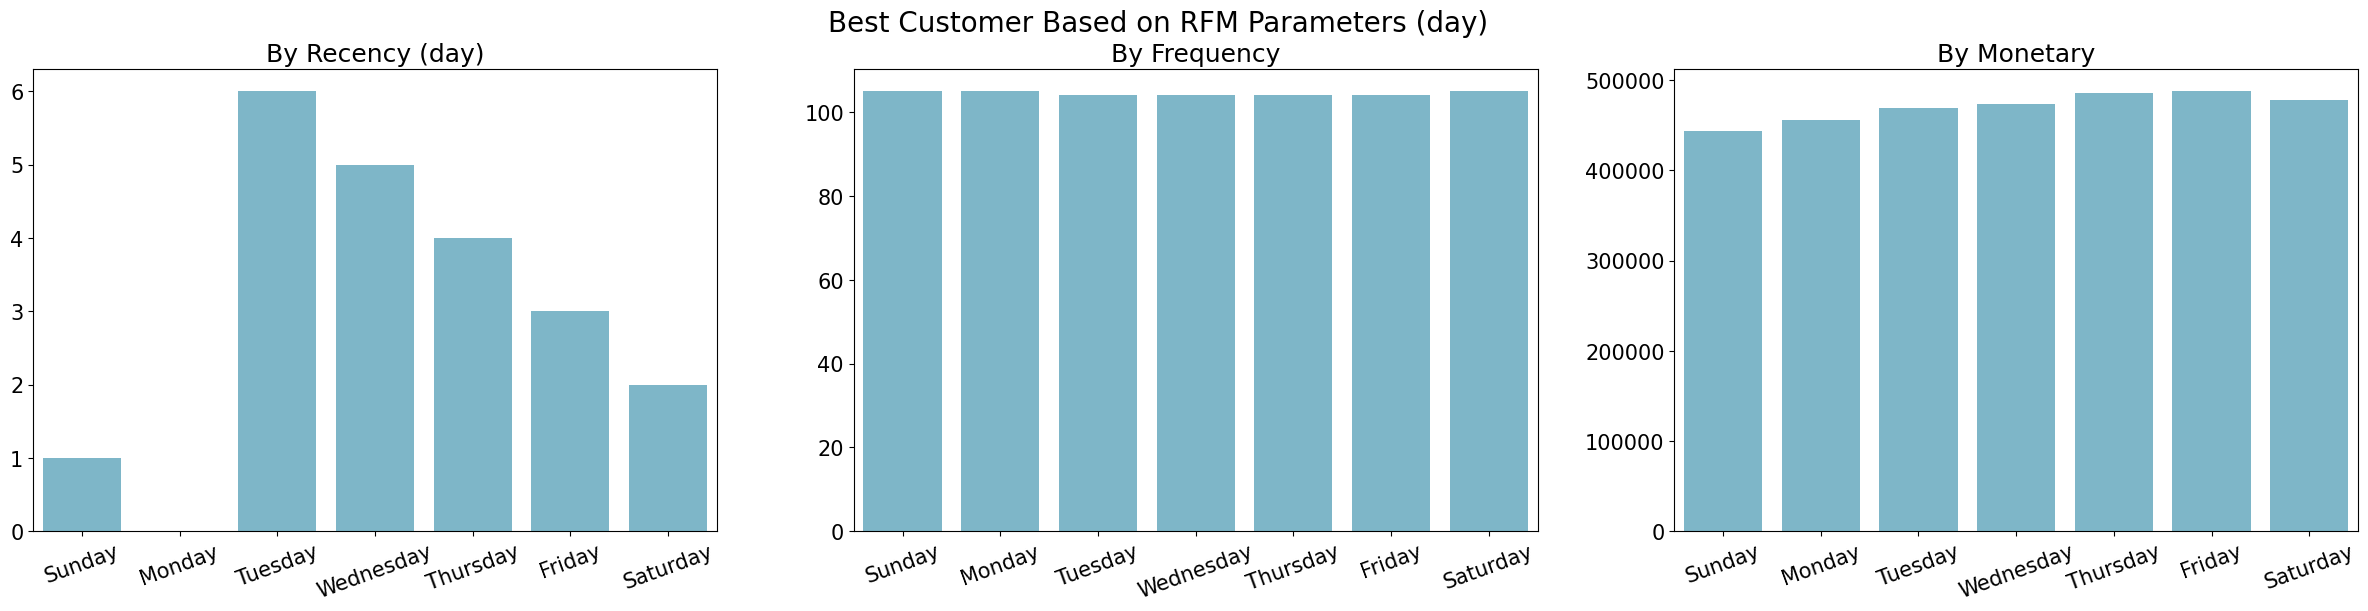

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4"] * len(rfm_df["day"].unique())

# Recency
sns.barplot(
    y="recency",
    x="day",
    data=rfm_df.sort_values(by="recency", ascending=True),
    palette=colors,
    hue="day",
    dodge=False,
    legend=False,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (day)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=20)
ax[0].tick_params(axis='y', labelsize=15)

# Frequency
sns.barplot(
    y="frequency",
    x="day",
    data=rfm_df.sort_values(by="frequency", ascending=False),
    palette=colors,
    hue="day",
    dodge=False,
    legend=False,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=20)
ax[1].tick_params(axis='y', labelsize=15)

# Monetary
sns.barplot(
    y="monetary",
    x="day",
    data=rfm_df.sort_values(by="monetary", ascending=False),
    palette=colors,
    hue="day",
    dodge=False,
    legend=False,
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=20)
ax[2].tick_params(axis='y', labelsize=15)

# Menambahkan judul utama
plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)

# Menampilkan plot
plt.show()

## Conclusion

- Conclution Pertanyaan 1 : Berdasarkan grafik yang ditampilkan, jumlah penyewaan sepeda tertinggi terjadi pada musim Fall. Hal ini ditunjukkan oleh tinggi batang pada musim tersebut yang lebih besar dibandingkan musim lainnya.
- Conclution Pertanyaan 2 : Berdasarkan grafik yang ditampilkan, jumlah peminjaman sepeda tertinggi tercatat pada pukul 17:00, menunjukkan angka peminjaman yang paling tinggi dibandingkan jam lainnya. Sebaliknya, jumlah peminjaman sepeda terendah terjadi pada pukul 4:00, dengan angka peminjaman yang paling rendah dalam rentang waktu yang diamati.

## Export Clean Dataset

In [40]:
# Menyimpan DataFrame 'day_df' ke dalam file CSV
day_df.to_csv("day_clean.csv", index=False)

In [41]:
# Menyimpan DataFrame 'hour_df' ke dalam file CSV
hour_df.to_csv("hour_clean.csv", index=False)